In [1]:
import pandas as pd
import matplotlib as plt
Comments = pd.read_csv("C:/Users/pc/Downloads/com/Comments.csv")
Posts = pd.read_csv("C:/Users/pc/Downloads/post/Posts.csv")
Users = pd.read_csv("C:/Users/pc/Downloads/user/Users.csv")

# Zadanie 1


array([[<AxesSubplot:title={'center':'CommentCount'}>]], dtype=object)

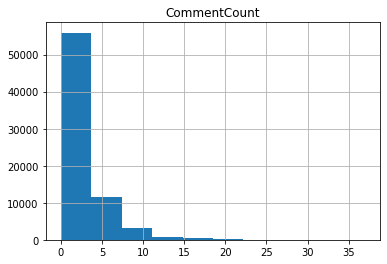

In [2]:
Posts.hist('CommentCount')

# Zadanie 2

In [21]:
users_views = Posts[["OwnerUserId", "ViewCount"]]
users_views
users_views_1 = users_views.groupby("OwnerUserId").sum()
top_user = users_views_1.sort_values(by = "ViewCount", ascending = False).head(1)
ID_1 = top_user.index[0]
top_user_name = Users[Users["Id"]== ID_1]
top_user_name["DisplayName"]

97    Mark Mayo
Name: DisplayName, dtype: object

# Zadanie 3

In [26]:
accepted_answers_1 = Posts[Posts["Id"].isin(Posts["AcceptedAnswerId"]) == True]
answers_mid = accepted_answers_1.groupby("OwnerUserId").size()\
                    .reset_index(name = "Counts").sort_values(by = "Counts", ascending = False).head(2)
ID_2 = answers_mid.sort_values(by = "Counts", ascending = True).head(1).iloc[0]["OwnerUserId"]
top_user_name = Users[Users["Id"]== ID_2]
top_user_name["DisplayName"]

1789    jpatokal
Name: DisplayName, dtype: object

# Zadanie 4


In [23]:
accepted_answers_2 = Posts[Posts["Id"].isin(Posts["AcceptedAnswerId"]) == True]
parent_id_answers = Posts[Posts["ParentId"].isin(accepted_answers_2["ParentId"]) == True][["ParentId", "Score"]]
parent_id_answers = parent_id_answers.groupby("ParentId").max()
parent_id = parent_id_answers.sort_values(by = "ParentId").reset_index()[["ParentId", "Score"]]
accepted_answers_2 = accepted_answers_2.sort_values(by = "ParentId").reset_index()[["ParentId", "Score"]]
accepted_answers_higher = accepted_answers_2[ (accepted_answers_2["Score"] < parent_id["Score"])]
comments_higher = accepted_answers_higher.shape[0]
percentage = comments_higher/accepted_answers_2.shape[0]
percentage

0.09044220055710306